# <font color='#FFE15D'>**Week 11: Logistic Regression 🔴🔵**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **🔸 Load Dataset**

In [2]:
df = pd.read_csv('data/exam.csv')
df

,study_hours,pass_fail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


## **🔸 Train-Test Split**

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df[['study_hours']].values
y = df[['pass_fail']].values
X, y

(array([[0.5 ],
        [0.75],
        [1.  ],
        [1.25],
        [1.5 ],
        [1.75],
        [1.75],
        [2.  ],
        [2.25],
        [2.5 ],
        [2.75],
        [3.  ],
        [3.25],
        [3.5 ],
        [4.  ],
        [4.25],
        [4.5 ],
        [4.75],
        [5.  ],
        [5.5 ]]),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=int64))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 1), (4, 1), (16, 1), (4, 1))

## **🔸 Logistic Regression (from Scratch)**

### Logistic Regression Model

$\hat{y}=\sigma(x)=\frac{1}{1+e^{-Xw}}$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

In [8]:
y_hat = logistic_regression(np.random.randn(5, 2), np.random.randn(2, 1))

### Binary Cross Entropy (BCE)

$L=-[ylog(\hat{y})+(1-y)log(1-\hat{y})]$

In [9]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

In [10]:
bce(np.ones((5, 1)), y_hat)

0.9228247096426923

### Gradient

$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [11]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

In [12]:
gradient(np.random.randn(5, 2), np.ones((5, 1)), y_hat)

array([[0.34704248],
       [0.05059683]])

### Gradient Descent

In [13]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

### Accuracy

In [14]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

In [15]:
accuracy(np.array([1, 0, 1]), np.array([0.7, 0.5, 0.3]))

0.6666666666666666

### Train

In [16]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(16, 2)

In [17]:
m = 1
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.01
n_epochs = 2000

(2, 1)


In [18]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)
    
    # gradients
    grads = gradient(x_train, y_train, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=99, 	 E=0.7355,	 w=[0.51016106 0.20670993]
Epoch=199, 	 E=0.6865,	 w=[0.31937505 0.12783908]
Epoch=299, 	 E=0.6627,	 w=[0.16836718 0.15710358]
Epoch=399, 	 E=0.6416,	 w=[0.02838145 0.1962488 ]
Epoch=499, 	 E=0.6225,	 w=[-0.10399994  0.23471385]
Epoch=599, 	 E=0.6054,	 w=[-0.22945118  0.27153865]
Epoch=699, 	 E=0.59,	 w=[-0.34838345  0.30669151]
Epoch=799, 	 E=0.5762,	 w=[-0.4611778  0.3402351]
Epoch=899, 	 E=0.5637,	 w=[-0.56820302  0.37224349]
Epoch=999, 	 E=0.5524,	 w=[-0.66981392  0.40279238]
Epoch=1099, 	 E=0.5422,	 w=[-0.7663489  0.4319569]
Epoch=1199, 	 E=0.533,	 w=[-0.85812825  0.45981054]
Epoch=1299, 	 E=0.5247,	 w=[-0.94545341  0.4864244 ]
Epoch=1399, 	 E=0.5171,	 w=[-1.0286068   0.51186671]
Epoch=1499, 	 E=0.5102,	 w=[-1.10785205  0.53620249]
Epoch=1599, 	 E=0.504,	 w=[-1.18343466  0.55949341]
Epoch=1699, 	 E=0.4983,	 w=[-1.2555828   0.58179773]
Epoch=1799, 	 E=0.4931,	 w=[-1.32450826  0.60317032]
Epoch=1899, 	 E=0.4883,	 w=[-1.39040744  0.62366271]
Epoch=1999, 	 E=0.48

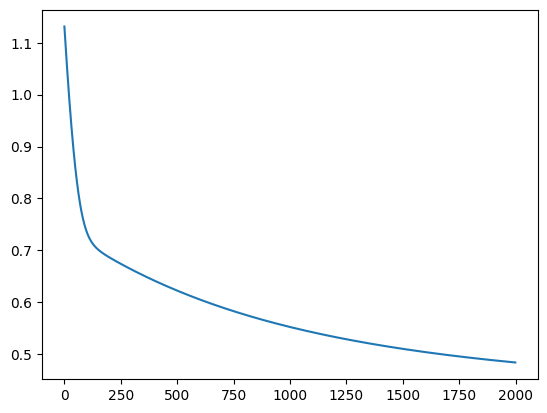

In [19]:
plt.plot(error_hist)

### Test

In [20]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(4, 2)

In [21]:
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.75

In [22]:
y_hat, y_test

(array([[0.38025228],
        [0.65415149],
        [0.78256233],
        [0.53863425]]),
 array([[0],
        [1],
        [1],
        [0]], dtype=int64))

## **🔸 Dataset**

In [66]:
from sklearn.datasets import load_breast_cancer, make_classification, make_blobs, make_circles

### Breast Cancer Dataset

In [71]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

### Synthetic dataset

(1000, 2) (1000,)


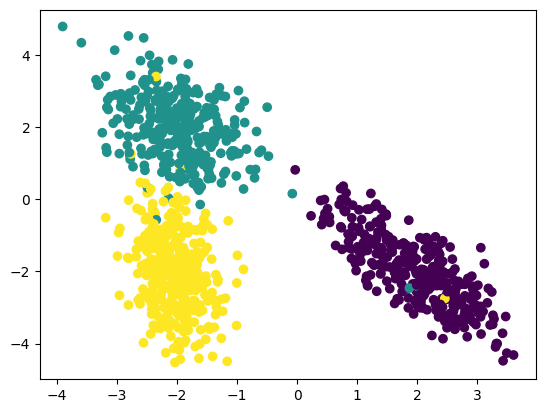

In [102]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, n_classes=3, random_state=27)
print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)

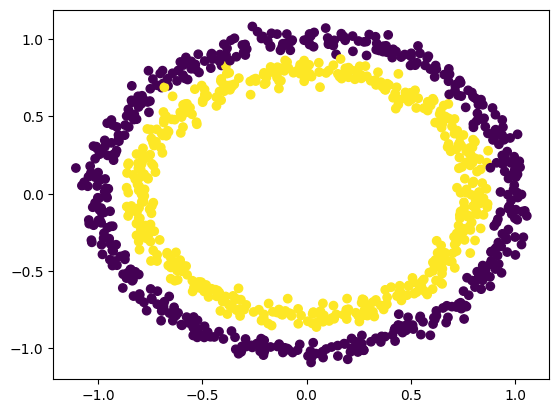

In [107]:
X, y = make_circles(n_samples=1000, noise=0.04)

plt.scatter(X[:, 0], X[:, 1], c=y)

## **🔸 Logistic Regression (sklearn)**

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [109]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

### `LogisticRegression()`

In [125]:
model = LogisticRegression(solver='sag', max_iter=200, random_state=14)
model.fit(x_train, y_train)
model.predict(x_test), y_test

C:\Users\PC\anaconda3\envs\howsam-python-ai\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1]),
 array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1]))

In [117]:
model.predict_proba(x_test)

array([[4.21134386e-03, 9.95788656e-01],
       [9.38136536e-01, 6.18634637e-02],
       [4.28348204e-02, 9.57165180e-01],
       [6.59223489e-01, 3.40776511e-01],
       [1.24465174e-03, 9.98755348e-01],
       [9.43262400e-02, 9.05673760e-01],
       [4.03014721e-02, 9.59698528e-01],
       [8.29713920e-05, 9.99917029e-01],
       [2.58405690e-01, 7.41594310e-01],
       [9.99999847e-01, 1.52507161e-07],
       [2.15416507e-03, 9.97845835e-01],
       [9.81922401e-01, 1.80775992e-02],
       [9.61556238e-01, 3.84437620e-02],
       [7.95211603e-04, 9.99204788e-01],
       [9.98359110e-01, 1.64088991e-03],
       [1.16301901e-03, 9.98836981e-01],
       [3.69006171e-01, 6.30993829e-01],
       [4.28310612e-02, 9.57168939e-01],
       [8.66960258e-01, 1.33039742e-01],
       [6.64977245e-02, 9.33502276e-01],
       [1.00000000e+00, 2.23809089e-14],
       [9.57552209e-04, 9.99042448e-01],
       [1.00000000e+00, 3.77196123e-16],
       [1.47462027e-02, 9.85253797e-01],
       [3.879722

In [119]:
model.predict_log_proba(x_test)

array([[-5.46997348e+00, -4.22023655e-03],
       [-6.38597795e-02, -2.78282552e+00],
       [-3.15040395e+00, -4.37793010e-02],
       [-4.16692669e-01, -1.07652841e+00],
       [-6.68889952e+00, -1.24542696e-03],
       [-2.36099587e+00, -9.90761261e-02],
       [-3.21136728e+00, -4.11360773e-02],
       [-9.39701468e+00, -8.29748343e-05],
       [-1.35322449e+00, -2.98952937e-01],
       [-1.52507173e-07, -1.56960543e+01],
       [-6.14035207e+00, -2.15648862e-03],
       [-1.82429953e-02, -4.01308172e+00],
       [-3.92022258e-02, -3.25855883e+00],
       [-7.13690231e+00, -7.95527952e-04],
       [-1.64223765e-03, -6.41251656e+00],
       [-6.75673606e+00, -1.16369584e-03],
       [-9.96941910e-01, -4.60459197e-01],
       [-3.15049171e+00, -4.37753735e-02],
       [-1.42762141e-01, -2.01710739e+00],
       [-2.71058755e+00, -6.88118784e-02],
       [-2.24265051e-14, -3.14305681e+01],
       [-6.95113031e+00, -9.58010955e-04],
       [-3.33066907e-16, -3.55137664e+01],
       [-4.

In [126]:
model.score(x_train, y_train)

0.9208791208791208

In [127]:
model.score(x_test, y_test)

0.9122807017543859

### `SGDClassifier()`

In [142]:
model = SGDClassifier(loss='log_loss', random_state=27)
model.fit(x_train, y_train)

SGDClassifier(loss='log_loss', random_state=27)

In [143]:
model.score(x_train, y_train)

0.9098901098901099

In [144]:
model.score(x_test, y_test)

0.8508771929824561

## **🔸 Decision Boundary**

In [145]:
from sklearn.datasets import make_classification, make_blobs, make_circles

(1000, 2) (1000,)


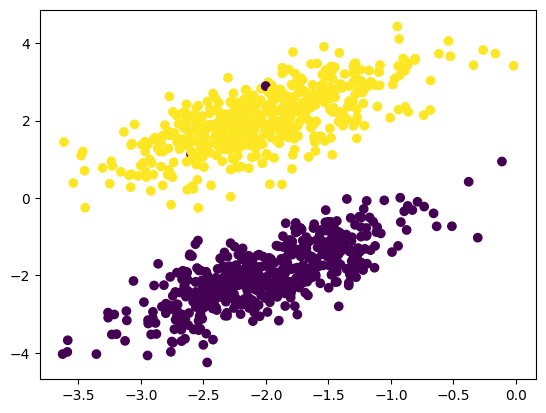

In [146]:
X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_redundant=0, 
                           n_classes=2, 
                           n_clusters_per_class=1,
                           class_sep=2,
                           random_state=12)
print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y);

In [147]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

-3.6265185061559873 -4.246437891184157 -0.01810604403108962 4.430597030177341
(500, 500) (500, 500)


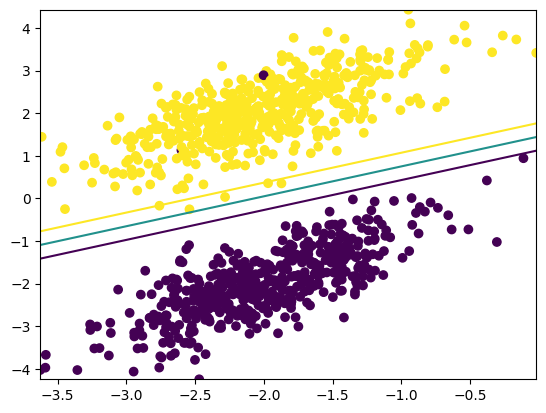

In [161]:
x1_min, x2_min = X.min(0)
x1_max, x2_max = X.max(0)

print(x1_min, x2_min, x1_max, x2_max)

n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)
print(x1m.shape, x2m.shape)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[-1, 0, 1])

### mlxtend

In [162]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

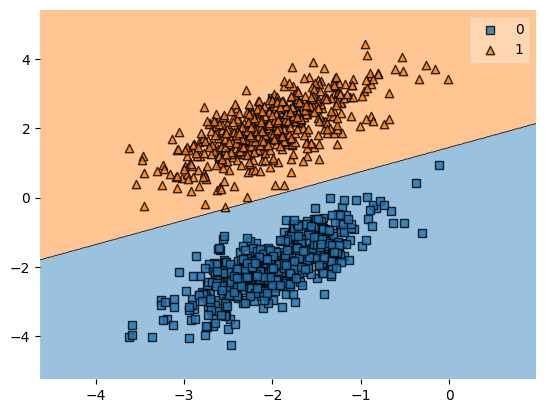

In [163]:
plot_decision_regions(X, y, clf=model)

## **🔸 Nonlinear Logistic Regression**

In [164]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

### Dataset 1

(100, 2) (100,)


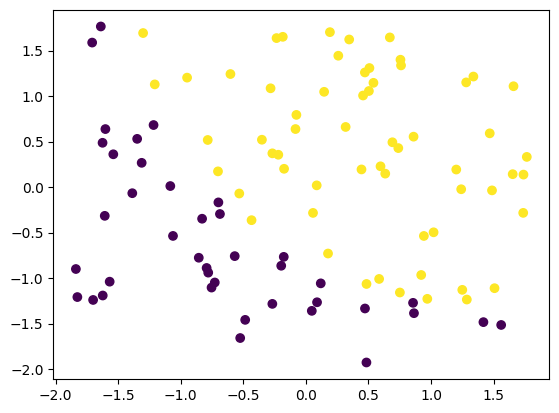

In [167]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y);

<AxesSubplot: >

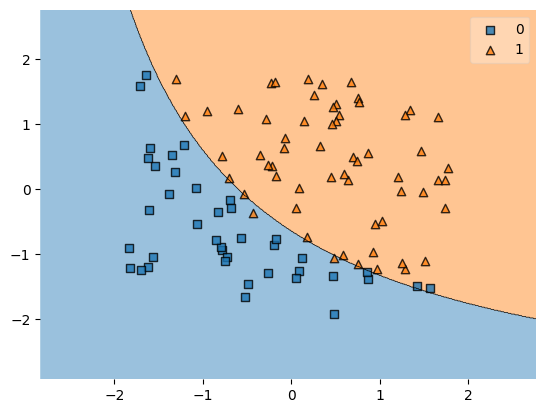

In [169]:
model = make_pipeline(PolynomialFeatures(degree=2, interaction_only=True), 
                      LogisticRegression())
model.fit(X, y)

plot_decision_regions(X, y, clf=model)

### Dataset 2

(118, 2) (118,)


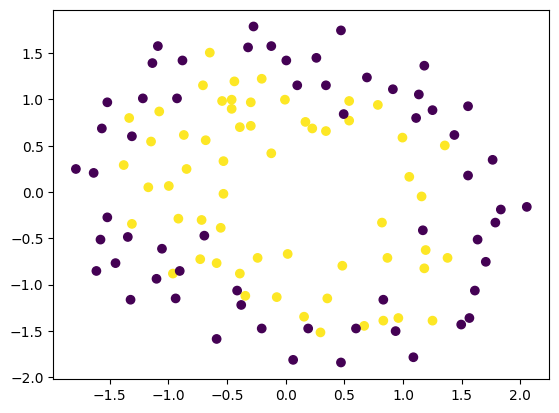

In [170]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y);

<AxesSubplot: >

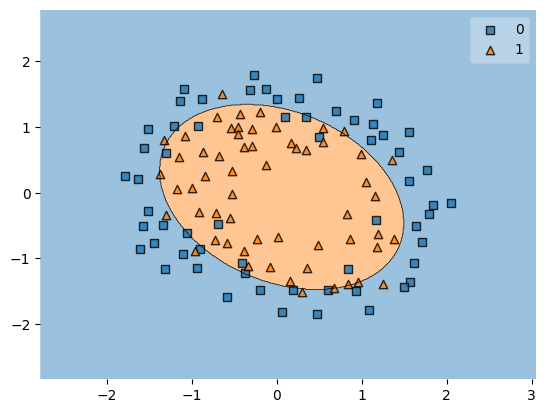

In [180]:
model = make_pipeline(PolynomialFeatures(degree=2), 
                      LogisticRegression())
model.fit(X, y)

plot_decision_regions(X, y, clf=model)

## **🔸 Multiclass Classification (One vs. All) (from Scratch)**

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

### Data

In [61]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [66]:
x_train_aug = np.hstack((np.ones((len(x_train), 1)), x_train))
y_train_oh = label_binarize(y_train, classes=np.unique(y_train))
x_train_aug.shape, y_train_oh.shape

((120, 5), (120, 3))

### Logistic Regression Model

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [68]:
def multi_logistic_regression(x, w):
    # x: nx(m+1)
    # w: (m+1)xc
    # y_hat: nxc
    
    y_hat = sigmoid(x @ w)
    return y_hat

In [71]:
y_hat = multi_logistic_regression(x_train_aug, np.random.randn(5, 3))
y_hat.shape

(120, 3)

### Binary Cross Entropy (BCE)

In [78]:
def bce(y, y_hat):
    loss = -np.mean(np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat), 1))
    return loss

In [79]:
bce(y_train_oh, y_hat)

10.397122309343478

### Gradient

$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [80]:
def gradient(x, y, y_hat):
    # x: nx(m+1)
    # y: nxc
    # y_hat: nxc
    # grads: (m+1)xc

    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

In [81]:
gradient(x_train_aug, y_train_oh, y_hat)

array([[ 0.65823146, -0.10610447,  0.48080278],
       [ 4.12616255, -0.71322989,  2.49980053],
       [ 1.88468068, -0.21124239,  1.54292176],
       [ 3.25398114, -0.68891333,  0.97692076],
       [ 1.12246251, -0.21922787,  0.19253474]])

### Gradient Descent

In [ ]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

### Accuracy

In [83]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.argmax(y_hat, 1)) / len(y)
    return acc

In [82]:
np.argmax(y_hat, 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [84]:
accuracy(y_train, y_hat)

0.3416666666666667

### Train

In [85]:
n, mp = x_train_aug.shape
c = len(np.unique(y))

w = np.random.randn(mp, c)
w.shape

(5, 3)

In [86]:
w

array([[-0.07822996,  1.93016324, -0.29327256],
       [-0.78001405,  0.56947894, -0.45025582],
       [-0.62586369, -0.19313583,  0.03692619],
       [-0.69746982,  0.77178683, -0.82076013],
       [ 0.32866519,  0.84773675, -1.15410213]])

In [87]:
eta = 0.01
n_epochs = 1000

In [88]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = multi_logistic_regression(x_train_aug, w)

    # loss
    e = bce(y_train_oh, y_hat)
    error_hist.append(e)
    
    # gradients
    grads = gradient(x_train_aug, y_train_oh, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4}')

Epoch=99, 	 E=1.718
Epoch=199, 	 E=1.347
Epoch=299, 	 E=1.187
Epoch=399, 	 E=1.099
Epoch=499, 	 E=1.042
Epoch=599, 	 E=1.002
Epoch=699, 	 E=0.9702
Epoch=799, 	 E=0.9448
Epoch=899, 	 E=0.9234
Epoch=999, 	 E=0.9051


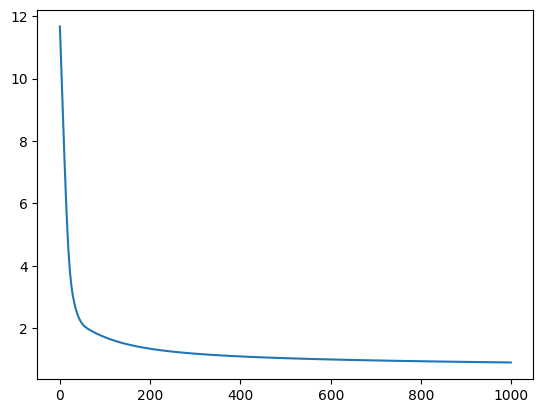

In [89]:
plt.plot(error_hist, label='Train');

In [90]:
w

array([[ 0.25435774,  1.83832007, -0.54477174],
       [ 0.36849435, -0.12871801, -0.6385341 ],
       [ 0.82068511, -0.95207381, -0.67693451],
       [-1.69177485,  0.15009304,  1.30095053],
       [-0.21808353,  0.27780544,  0.16606586]])

### Test

In [91]:
x_test_aug = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test_aug.shape, y_test.shape

((30, 5), (30,))

In [92]:
y_hat_test = multi_logistic_regression(x_test_aug, w)
y_hat_test

array([[0.92748991, 0.14156242, 0.01322697],
       [0.0181773 , 0.45001159, 0.58998021],
       [0.03051925, 0.3214195 , 0.51628617],
       [0.06260455, 0.25900787, 0.36410969],
       [0.00655289, 0.44340127, 0.75161694],
       [0.07714876, 0.28369986, 0.27592365],
       [0.0237064 , 0.36179644, 0.5505623 ],
       [0.90542414, 0.17887423, 0.02196568],
       [0.09735814, 0.42032084, 0.33142007],
       [0.13985013, 0.44474478, 0.302549  ],
       [0.92725835, 0.1187257 , 0.01354499],
       [0.91756104, 0.1470979 , 0.01369978],
       [0.89022933, 0.15563782, 0.02001466],
       [0.0166037 , 0.38788117, 0.60372091],
       [0.90936048, 0.15481014, 0.01959953],
       [0.04745906, 0.32724815, 0.37239665],
       [0.00663006, 0.32421288, 0.68916405],
       [0.01402946, 0.35265956, 0.58047343],
       [0.15762784, 0.32255978, 0.23426822],
       [0.05441381, 0.38661528, 0.43329796],
       [0.16100914, 0.36178308, 0.22704842],
       [0.07128661, 0.35786317, 0.37050524],
       [0.

In [93]:
accuracy(y_test, y_hat_test)

0.7666666666666667

In [96]:
y_test, np.argmax(y_hat_test, 1)

(array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
        1, 0, 0, 2, 1, 2, 2, 0]),
 array([0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2,
        2, 0, 0, 2, 1, 2, 2, 0], dtype=int64))

## **🔸 Exercise: Multiclass Classification (Softmax) (from scratch)**

## **🔸 Multiclass Classification (sklearn)**

In [108]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X[:, [0, 3]], y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 2), (120,), (30, 2), (30,))

In [111]:
model = LogisticRegression(multi_class='multinomial')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9666666666666667

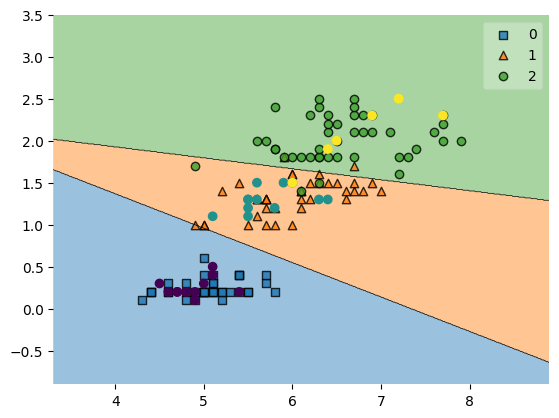

In [114]:
plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

In [117]:
model = SGDClassifier(loss='log_loss', penalty='none')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8666666666666667

<AxesSubplot: >

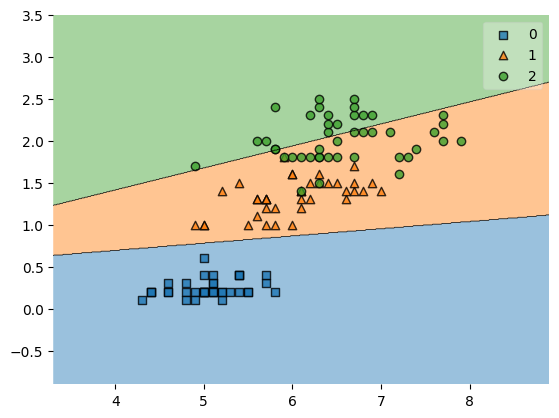

In [119]:
plot_decision_regions(x_train, y_train, clf=model)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

## **🔸 Evaluation Metrics**

In [106]:
df = pd.read_csv('data/exam.csv')
df.head()

,study_hours,pass_fail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [107]:
X = df[['study_hours']].values
y = df['pass_fail'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10, 1), (10, 1), (10,), (10,))

In [108]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)

LogisticRegression(penalty='none')

### Threshold

In [86]:
# model.predict(x_test)
y_hat = model.predict_proba(x_test)[:, 1]
y_hat

array([0.98361998, 0.99977378, 0.25670674, 0.99873869, 0.12754091,
       0.914958  , 0.96214693, 0.02552294, 0.12754091, 0.99998284])

In [97]:
t = 0.95
y_hat_binary = y_hat.copy()
y_hat_binary[y_hat < t] = 0
y_hat_binary[y_hat >= t] = 1
y_hat_binary

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 1.])

In [98]:
y_hat_binary = np.where(y_hat<t, 0, 1)
y_hat_binary, y_test

(array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1]),
 array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64))

#### More on threshold!

(55250, 2) (29750, 2) (15000, 2)
(14755,) (14995,)


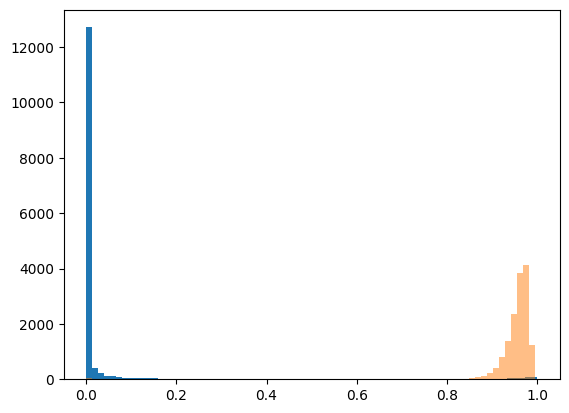

In [105]:
X, y = make_classification(n_samples=100000, n_features=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.0, 
                           random_state=12)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.35)
print(x_train.shape, x_valid.shape, x_test.shape)

model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_hat = model.predict_proba(x_valid)[:, 1]

negatives = y_hat[y_valid==0]
positives = y_hat[y_valid==1]
print(positives.shape, negatives.shape)

plt.hist(negatives, 75)
plt.hist(positives, 75, alpha=0.5);

### TP FP TN FN (from scratch)

In [109]:
y_test, y_hat_binary

(array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64),
 array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1]))

In [113]:
# True Positives (TP)
tp = np.sum((y_hat_binary==1) & (y_test==1))
tp

2

In [114]:
# False Positives (FP)
fp = np.sum((y_hat_binary==1) & (y_test==0))
fp

3

In [115]:
# True Negatives (TN)
tn = np.sum((y_hat_binary==0) & (y_test==0))
tn

2

In [116]:
# False Negatives (FN)
fn = np.sum((y_hat_binary==0) & (y_test==1))
fn

3

### TP FP TN FN (sklearn)

In [118]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix(y_test, y_hat_binary)

array([[2, 3],
       [3, 2]], dtype=int64)

### TPR FPR TNR FNR (from scratch)

In [119]:
# True Positive Rate (TPR)
tpr = tp / (tp + fn)
tpr

0.4

In [ ]:
# False Positive Rate (FPR)

In [ ]:
# True Negative Rate (TNR)

In [ ]:
# False Negative Rate (FNR)

### Exercise

* #### Train a LogisticRegression model.
* #### Plot the decision boundary and decision region.
* #### Write a function that calculates the {TP, FP, TN, FN} metrics.
* #### Find the {TP, FP, TN, FN} samples and mark them with different colors/shapes in the figure.

In [121]:
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=1., 
                           random_state=12)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### ROC Curve (from scratch)

In [149]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_hat = model.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'TPR')

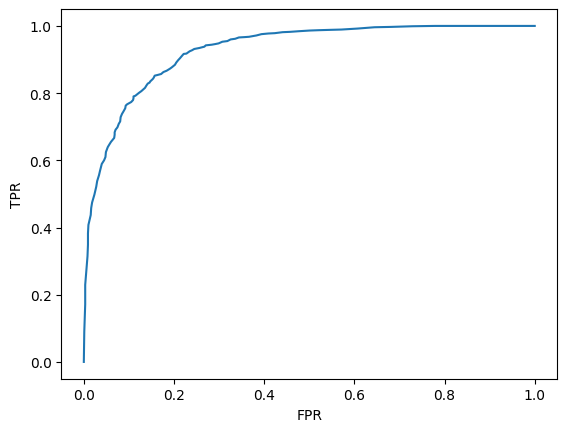

In [150]:
t = np.linspace(0, 1, 100)

tpr, fpr = [], []
for ti in t:
    y_hati = np.where(y_hat<ti, 0, 1)
    tn, fp, fn, tp = confusion_matrix(y_test, y_hati).ravel()
    tpri = tp / (tp + fn)
    fpri = fp / (fp + tn)
    tpr.append(tpri)
    fpr.append(fpri)
    
tpr = np.array(tpr)
fpr = np.array(fpr)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

### ROC Curve (sklearn)

In [151]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
fpr.shape, tpr.shape, thresholds.shape

((440,), (440,), (440,))

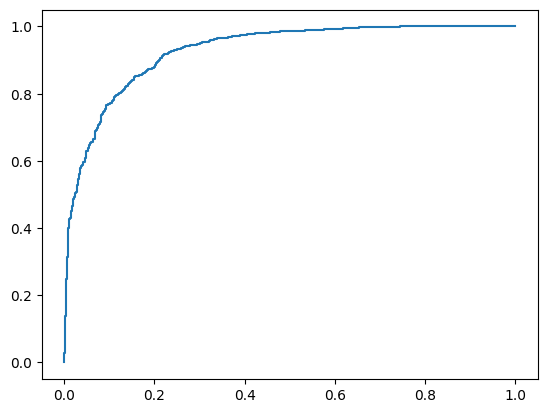

In [155]:
plt.plot(fpr, tpr)

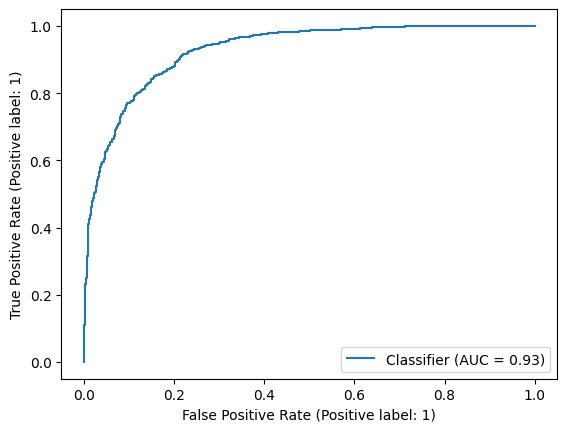

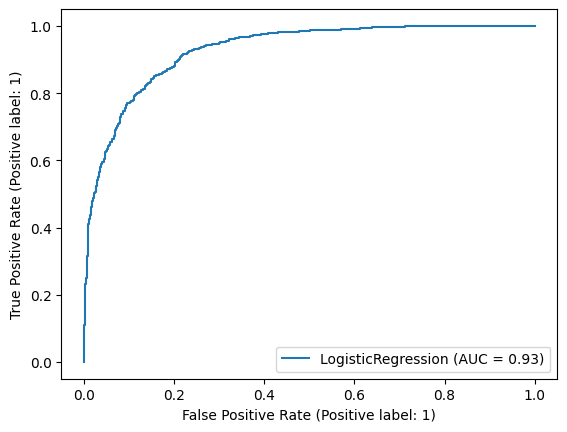

In [157]:
RocCurveDisplay.from_predictions(y_test, y_hat)
RocCurveDisplay.from_estimator(model, x_test, y_test)

In [158]:
roc_auc_score(y_test, y_hat)

0.9276280512204882

### Precision & Recall (sklearn)

In [171]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, average_precision_score, PrecisionRecallDisplay, f1_score

In [173]:
t = 0.5
y_hat_binary = np.where(y_hat<t, 0, 1)
precision_score(y_test, y_hat_binary)

0.8532934131736527

In [174]:
recall_score(y_test, y_hat_binary)

0.8382352941176471

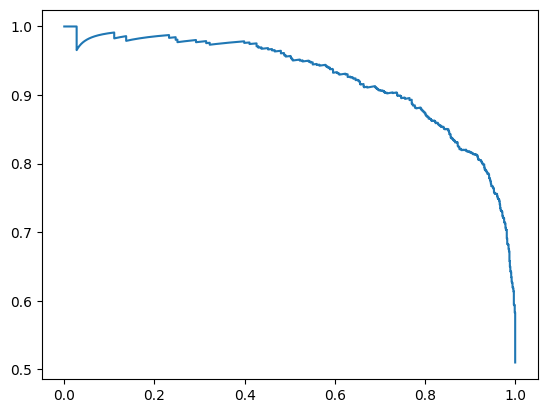

In [190]:
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)
plt.plot(recall, precision)

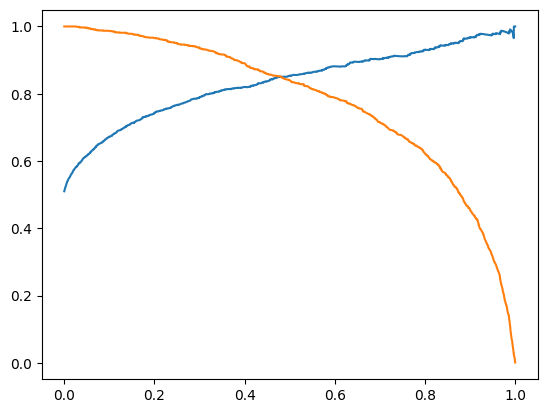

In [192]:
plt.plot(thresholds, precision[:-1])
plt.plot(thresholds, recall[:-1])

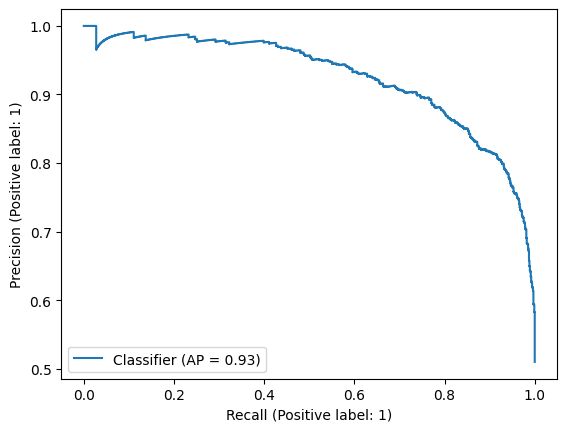

In [193]:
PrecisionRecallDisplay.from_predictions(y_test, y_hat)

In [194]:
average_precision_score(y_test, y_hat)

0.9253831334445851

In [195]:
f1_score(y_test, y_hat_binary)

0.8456973293768546

### Confusion Matrix (sklearn)

In [196]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [197]:
X, y = load_iris(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [198]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
y_hat

array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 1])

In [199]:
confusion_matrix(y_test, y_hat)

array([[ 8,  1,  0],
       [ 0, 13,  0],
       [ 0,  1,  7]], dtype=int64)

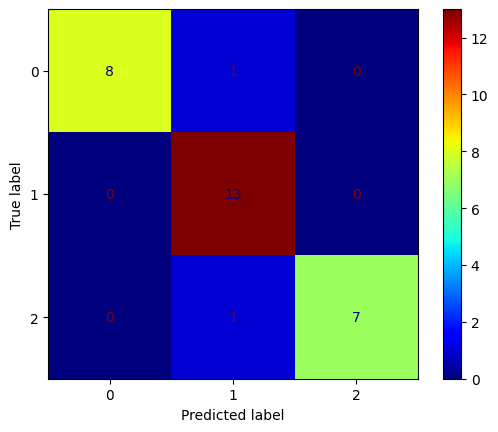

In [201]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='jet')

In [206]:
precision_score(y_test, y_hat, average=None)
precision_score(y_test, y_hat, average='weighted')

0.9422222222222222

- Class A: 
   - True Positives (TP): 10
   - False Positives (FP): 2

- Class B: 
   - TP: 15
   - FP: 1

- Class C: 
   - TP: 12
   - FP: 3

--------------
### 1. Micro

- Total TP: 10 + 15 + 12 = 37
- Total FP: 2 + 1 + 3 = 6

- Precision = TP / (TP + FP) = 37 / (37 + 6) ≈ 0.860

----------------
### 2. Macro

For Class A:
- Precision = TP / (TP + FP) = 10 / (10 + 2) ≈ 0.833

For Class B:
- Precision = TP / (TP + FP) = 15 / (15 + 1) ≈ 0.938

For Class C:
- Precision = TP / (TP + FP) = 12 / (12 + 3) ≈ 0.800


- Average Precision = (0.833 + 0.938 + 0.800) / 3 ≈ 0.857

-----------------------------
### 3. Weighted:

- Class A: 50 samples
- Class B: 100 samples
- Class C: 75 samples


- Weighted Average Precision = (0.833 * 50 + 0.938 * 100 + 0.800 * 75) / (50 + 100 + 75) ≈ 0.872

-----------------------
### In summary:

- Micro-Averaged Precision: 0.860
- Macro-Averaged Precision: 0.857
- Weighted-Averaged Precision: 0.872